In [1]:
from img_doc.extractors import TsPubLayNetExtractor
import matplotlib.pyplot as plt

2024-02-22 10:24:37.649141: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 10:24:37.685185: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-22 10:24:37.685213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-22 10:24:37.686205: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-22 10:24:37.691756: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 10:24:37.692180: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
tspln_ext = TsPubLayNetExtractor()

In [3]:
# Долго
docs = tspln_ext.dataset_extractor("/home/daniil/program/dataset/mini_ts_publaynet/")

In [4]:
doc = docs[0]
doc.update_image_from_path(doc.path)
page = doc.pages[0]


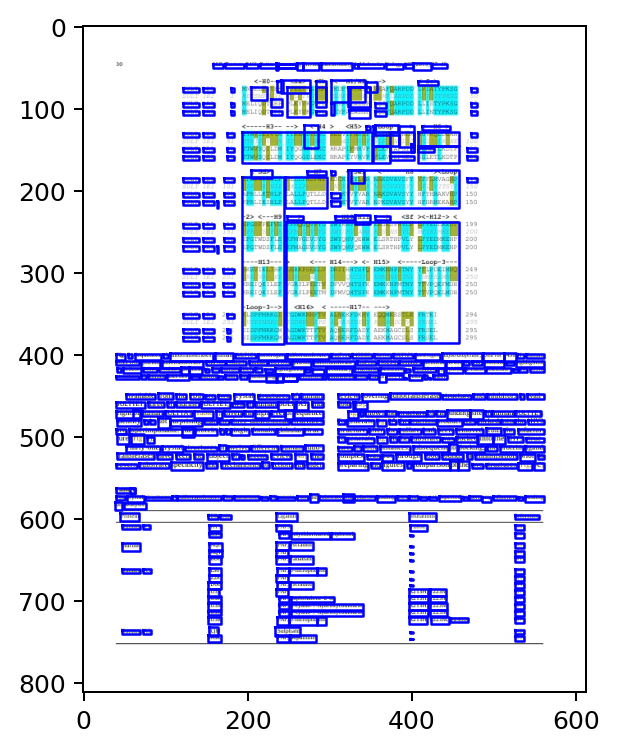

In [5]:
plt.figure(dpi=180)

page.image.plot()
for word in page.words:
    word.segment.plot()

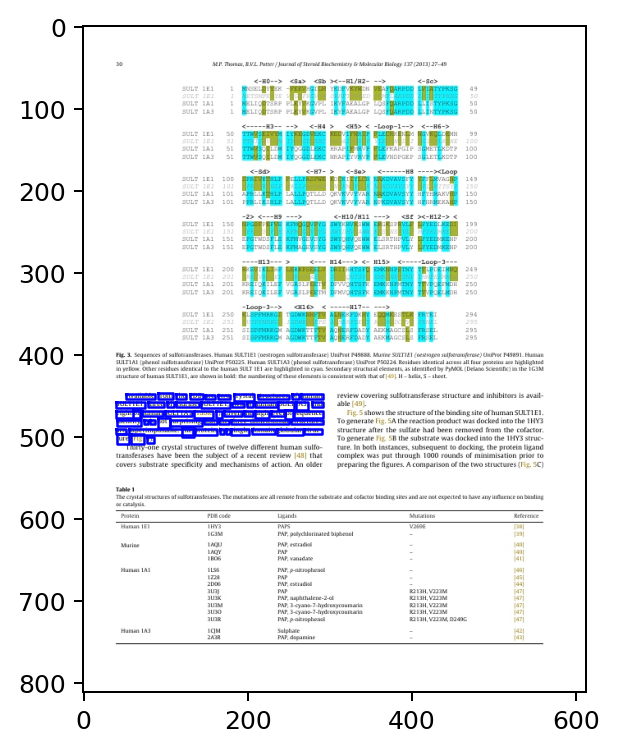

In [6]:
plt.figure(dpi=180)

page.image.plot()
for word in page.blocks[0].words:
    word.segment.plot()